# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

# **Práctica Autónoma: Aprendizaje Supervisado**

En este cuaderno, se cubriran los siguientes temas:

### 1. Contexto del Problema
### 2. Entrenamiento de Modelos de Clasificación
### 3. Métricas para Modelos de Clasificación
### 4. Optimización de los Modelos Iniciales

## Contexto del Dataset:
Para este reto, utilizaremos la función `load_digits` de la biblioteca scikit-learn. Este método proporciona un conjunto de datos que consiste en imágenes 8x8 de dígitos escritos a mano, donde cada píxel tiene un valor entre 0 y 15. Estas imágenes representan dígitos del 0 al 9.

El conjunto de datos consta de 1797 muestras en total, con 10 clases diferentes (una para cada dígito). Cada muestra es una matriz bidimensional de 8x8 píxeles, que se aplanan en un vector unidimensional de longitud 64 para ser utilizadas como características en los modelos de clasificación.

### Tarea de Clasificación:
En este reto, se propone utilizar dos algoritmos de clasificación supervisada: árboles de decisión y k-Nearest Neighbors (KNN). El objetivo es entrenar modelos utilizando estos algoritmos en el conjunto de datos MNIST para clasificar correctamente los dígitos escritos a mano. Se evaluará el accuracy de cada modelo y se graficará la matriz de confusión para visualizar el rendimiento de la clasificación.


imagenes: (1797, 8, 8)
labels: (1797,)


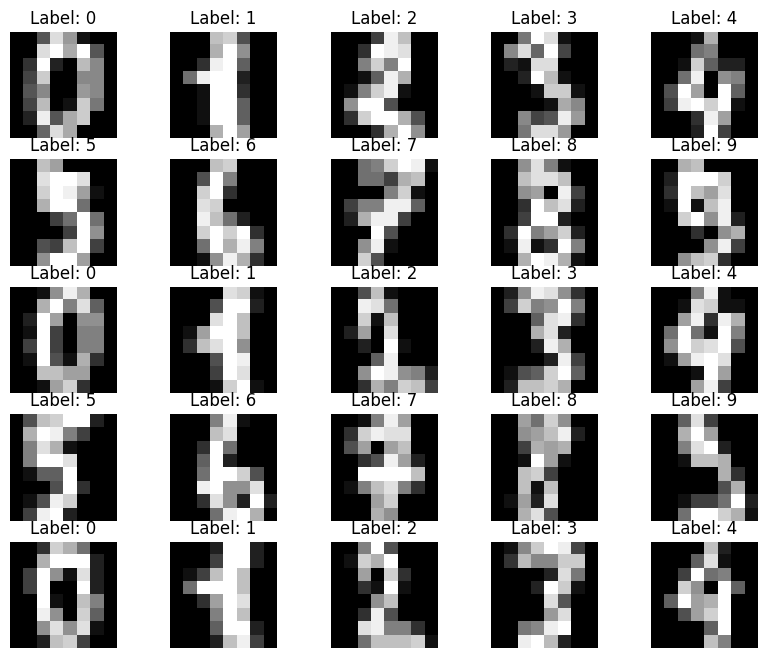

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar el conjunto de datos
digits = load_digits()

# Obtener las imágenes y las etiquetas
images = digits.images
labels = digits.target

# Imprimir dimensiones de los datos
print(f'imagenes: {images.shape}')
print(f'labels: {labels.shape}')

# Visualizar algunas de las imágenes
plt.figure(figsize=(10, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.show()

Después de cargar las imágenes del conjunto de datos MNIST, es común vectorizarlas antes de utilizarlas como entrada para los algoritmos de aprendizaje automático. La vectorización de las imágenes implica convertir cada imagen bidimensional en un vector unidimensional. Hay varias razones para esto:

**Compatibilidad con algoritmos de aprendizaje automático:** Muchos algoritmos de aprendizaje automático, como los árboles de decisión y los modelos lineales, esperan que los datos de entrada estén en forma de vectores unidimensionales. Vectorizar las imágenes asegura que los datos sean compatibles con estos algoritmos.

**Simplificación del procesamiento de datos:** Trabajar con vectores unidimensionales hace que sea más fácil y eficiente realizar operaciones matemáticas y manipulaciones de datos. Esto puede acelerar el proceso de entrenamiento y evaluación del modelo.

Después de la vectorización, las dimensiones de cada observación cambian de acuerdo con el tamaño original de las imágenes. En el caso del conjunto de datos MNIST, las imágenes originales tienen dimensiones de 8x8 píxeles. Después de la vectorización, cada imagen se convierte en un vector unidimensional de longitud 64 (8x8 = 64). Por lo tanto, cada observación en el conjunto de datos modificado tiene una longitud de 64, lo que significa que cada observación tiene 64 características (o dimensiones) después de la vectorización. Esto simplifica el procesamiento de las imágenes y permite utilizarlas como entrada en algoritmos de aprendizaje automático.

In [2]:
# Vectorizar las imágenes
vectorized_images = images.reshape((images.shape[0], -1))  # Se convierten las imágenes en vectores unidimensionales

# Ahora, vectorized_images contiene las imágenes vectorizadas, listas para ser utilizadas en el entrenamiento del modelo
print(f'imagenes: {vectorized_images.shape}')

imagenes: (1797, 64)


# 2. Entrenamiento de Modelos de Clasificación


### Entrenando el Modelo de Árbol de Decisión

Crearemos un modelo de Árbol de Decisión con un hiperparámetro específico:

* **Modelo (max_depth=7):** Este modelo permite árboles más profundos, potencialmente capturando patrones más complejos pero con riesgo de sobreajuste.

### Entrenando el Modelo KNN

Similarmente, entrenaremos un modelo KNN con un hiperparámetro específico:

* **Modelo (n_neighbors=5):** Este modelo considera 5 vecinos más cercanos, potencialmente reduciendo el ruido pero pudiendo perder patrones más amplios.


In [3]:
# Dividir el dataset en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectorized_images, labels, test_size=0.2, stratify=labels)

In [4]:
# Instanciar el Estimador (Tree) y Entrenamiento

from sklearn import tree

model_Tree = tree.DecisionTreeClassifier(max_depth=7)
model_Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [6]:
# Instanciar el Estimador (Knn) y Entrenamiento

from sklearn import neighbors

model_Knn = neighbors.KNeighborsClassifier(n_neighbors=5)
model_Knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluación y Comparación

Ahora, evaluemos el rendimiento de ambos modelos usando matrices de confusión y puntuaciones de accuracy:

**Evaluando Cada Modelo:**

* Cada modelo predice en el conjunto de prueba.
* Se calculan las matrices de confusión y las puntuaciones de accuracy para cada modelo.

**Comparación de Puntuaciones de accuracy:**

* Se presentan las puntuaciones de accuracy para ambos modelos.
* Esto nos permite comparar el rendimiento del árbol de decisión y el KNN con diferentes hiperparámetros.

**Visualización de la Matriz de Confusión:**

* Las matrices de confusión para cada modelo se visualizan usando Seaborn.
* Esto nos ayuda a comprender la distribución de las predicciones correctas e incorrectas para cada clase.

0.8222222222222222


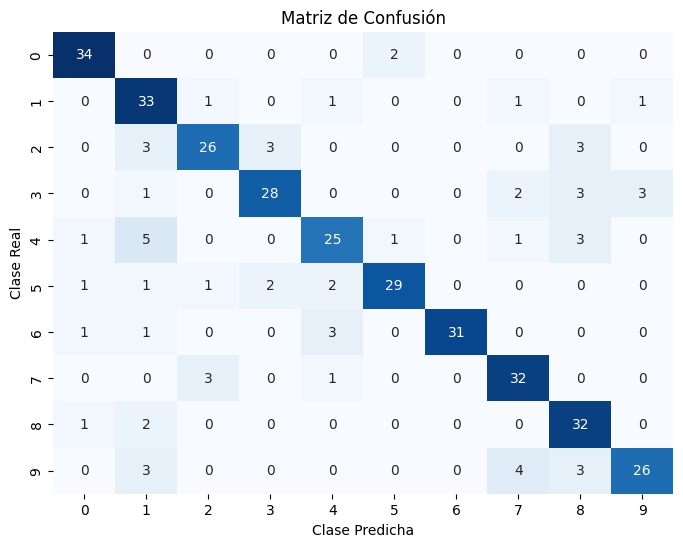

In [7]:
# Obtener predicciones usando conjunto de prueba y el Árbol
from sklearn.metrics import accuracy_score
import seaborn as sns

#Evaluación sobre el conjunto de prueba
y_pred = model_Tree.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print(acc)

# Visualiza la matriz de confusión en forma de gráfica (usa seaborn)
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [9]:
# Imprimir los parámetros predeterminados
model_Tree.feature_importances_


array([0.        , 0.        , 0.        , 0.        , 0.00142394,
       0.05577896, 0.        , 0.        , 0.        , 0.02936047,
       0.00393605, 0.        , 0.        , 0.00550099, 0.        ,
       0.        , 0.00265148, 0.00142394, 0.00684295, 0.        ,
       0.04369748, 0.10311721, 0.        , 0.        , 0.        ,
       0.00727155, 0.02038439, 0.06010745, 0.0058908 , 0.05465238,
       0.        , 0.        , 0.        , 0.07455399, 0.03489533,
       0.        , 0.08520404, 0.02796509, 0.00600274, 0.        ,
       0.        , 0.00856146, 0.13960122, 0.05718075, 0.01847239,
       0.00414299, 0.00729299, 0.        , 0.        , 0.        ,
       0.        , 0.00176297, 0.00547307, 0.0162613 , 0.03199838,
       0.        , 0.        , 0.        , 0.00237324, 0.        ,
       0.07434684, 0.        , 0.        , 0.00187117])

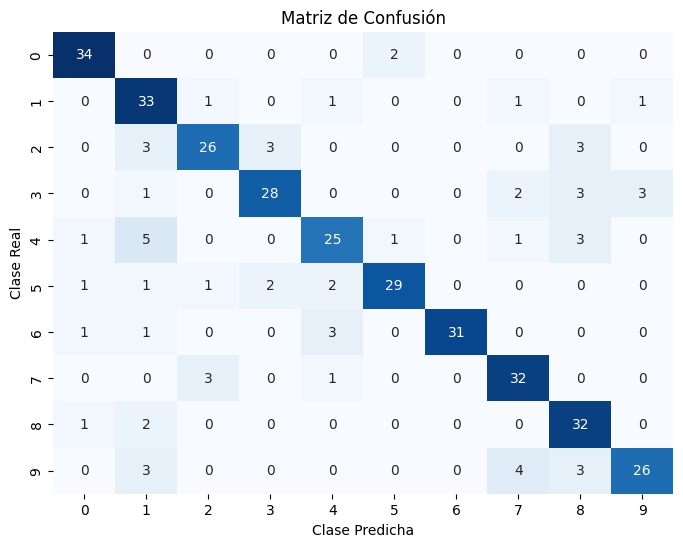

0.9777777777777777


In [13]:
#from sklearn.preprocessing import LabelEncoder
# Obtener predicciones usando conjunto de prueba y el modelo Knn
y_pred = model_Knn.predict(X_test)

# Visualiza la matriz de confusión en forma de gráfica (usa seaborn)
#class_names = labelencoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

# Obtener e Imprimir 'accuracy'
acc=accuracy_score(y_test, y_pred)
print(acc)

### Análisis y Conclusión

Al analizar las matrices de confusión y las puntuaciones de accuracy, podemos comparar el rendimiento del árbol de decisión y el KNN.
* ¿El árbol profundo o los 5 vecinos más cercanos condujeron a mejores resultados?
* ¿Qué algoritmo tuvo un mejor desempeño en este caso específico? Discute estas observaciones y las posibles razones detrás de ellas.

# 4. Optimización de los Modelos Iniciales

### Ajustando el Árbol de Decisión

* **¿Podría un valor diferente de `max_depth` mejorar el accuracy?**

    Experimenta con valores más altos (e.g., 15) o más bajos (e.g., 5) para observar su impacto en el accuracy y el sobreajuste.

* **¿Qué efecto tendría ajustar otros parámetros como `min_samples_leaf` o `max_features`?**

    Experimenta con diferentes valores para estos parámetros y observa cómo afectan el accuracy y la complejidad del modelo.

### Ajustando el Modelo KNN

* **¿Podría aumentar el número de vecinos (`n_neighbors`) mejorar el accuracy?**

    Prueba con valores más altos (e.g., 9, 11) o más bajos (e.g., 3) para observar su impacto en el accuracy y la complejidad del modelo.

* **¿Qué efecto tendría utilizar una métrica de distancia diferente, como la distancia Manhattan o la distancia de Minkowski?**

    Experimenta con diferentes métricas de distancia y observa cómo afectan el accuracy del modelo.

### Preguntas Finales para Discusión

* **¿Qué algoritmo tuvo un mejor desempeño en general?**

    Considera las matrices de confusión, las puntuaciones de accuracy y la complejidad de los modelos al responder.



In [ ]:
# Instanciar un mejor estimador (Tree) y su entrenamiento

# SU CODIGO AQUI

In [ ]:
# Obtener nuevamente métricas para el nuevo modelo (matriz de confusión y accuracy)

In [ ]:
# Instanciar un mejor estimador (knn) y su entrenamiento

# SU CODIGO AQUI

In [ ]:
# Obtener nuevamente métricas para el nuevo modelo (matriz de confusión y accuracy)

# 5. Ventajas y Desventajas de Árboles de Decisión vs KNN

### Árboles de Decisión:

**Ventajas:**

* Interpretabilidad: Los árboles de decisión son fáciles de visualizar e interpretar, lo que permite comprender las reglas y decisiones que toma el modelo.
* Manejo de datos multivariados: Pueden manejar variables categóricas y numéricas sin necesidad de transformación previa.
* Robustez: Son relativamente robustos a valores atípicos y ruido en los datos.
* Escalabilidad: Pueden ser entrenados en datasets grandes con un rendimiento eficiente.

**Desventajas:**

* Sobreajuste: Los árboles de decisión pueden sufrir de sobreajuste si no se podan correctamente.
* Sensibilidad a cambios en los datos: Pequeños cambios en los datos pueden afectar significativamente la estructura del árbol y su rendimiento.
* Dificultad para capturar relaciones no lineales: Son menos eficientes para modelar relaciones complejas y no lineales entre las variables.

### KNN:

**Ventajas:**

* Simplicidad: El algoritmo KNN es simple de entender e implementar.
* No requiere entrenamiento: No requiere una fase de entrenamiento formal, lo que lo hace rápido para usar con nuevos datos.
* Robustez al ruido: Es relativamente robusto al ruido en los datos.
* Versatilidad: Puede ser utilizado para clasificación y regresión.

**Desventajas:**

* Interpretabilidad: Es difícil de interpretar las decisiones del modelo, ya que no hay una representación explícita de las reglas.
* Sensibilidad a la elección de la métrica de distancia: El rendimiento del modelo depende de la elección de la métrica de distancia utilizada.
* Escalabilidad: Puede ser computacionalmente costoso para datasets grandes.
* Sensibilidad a valores atípicos: Los valores atípicos pueden tener un gran impacto en las predicciones del modelo